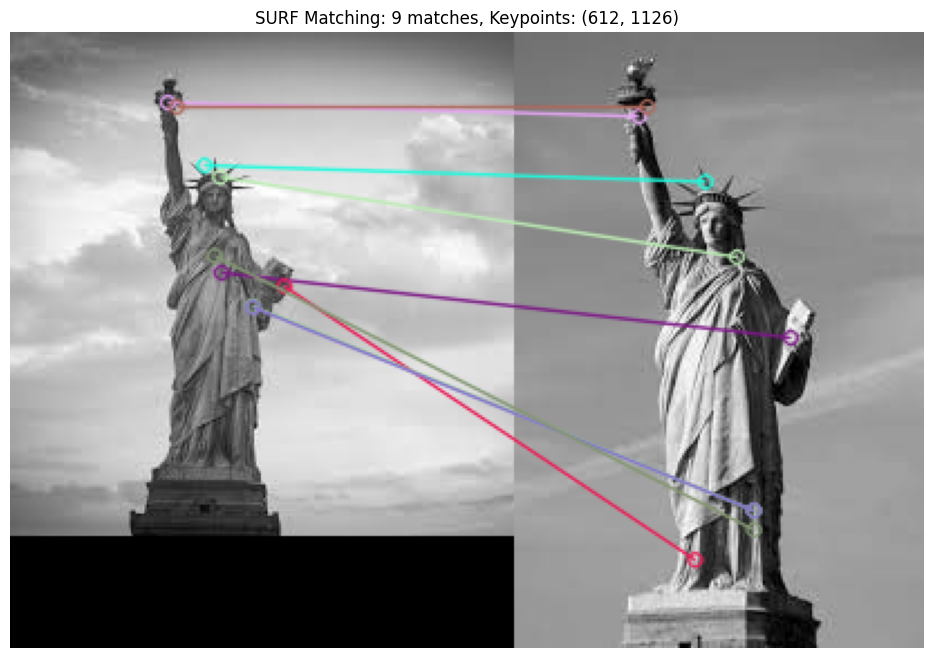

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('ASW.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('ASWE.jpeg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(nfeatures=5000)

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)

# Draw good matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

kp1_count = len(kp1)  # Get the number of keypoints in the first image
kp2_count = len(kp2)  # Get the number of keypoints in the second image

# Results
plt.figure(figsize=(14, 8))
plt.imshow(result, cmap='gray')
plt.title(f"SURF Matching: {len(good_matches)} matches, Keypoints: ({kp1_count}, {kp2_count})")
plt.axis('off')
plt.show()